<a href="https://colab.research.google.com/github/rahulbamnuya/LLM_Integration/blob/main/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [4]:
#Encoder class ,which maps input data into latent space

In [5]:
class Encoder(nn.Module):
  def __init__(self,input_dim,hidden_dim,laten_dim):
    """
    input_dim:dimension of input data
    hidden_dim:dimension of hidden layer
    latent_dim:dimension of latent space
    """
    super(Encoder,self).__init__()
    #define fully connected layer
    self.fc1=nn.Linear(input_dim,hidden_dim)
    self.fc2_mu=nn.Linear(hidden_dim,laten_dim)
    self.fc_logvar=nn.Linear(hidden_dim,laten_dim)
  #define the forward pass through the encoder
  def forward(self,x):
    "return mu:mean of laten space"
    #activation on hidden layer
    h=torch.relu(self.fc1(x))
    #calculate mean
    mu=self.fc2_mu(h)
    logvar=self.fc_logvar(h)
    return mu,logvar



In [6]:
#define deoder class ,which map laten to output space


In [15]:
class Decoder(nn.Module):
  def __init__(self,laten_dim,hidden_dim,output_dim):
    """
    laten_dim:dimension of latent space
    hidden_dim:dimension of hidden layer
    output_dim:dimension of output data
    """
    super(Decoder,self).__init__()
    #define
    self.fc1=nn.Linear(laten_dim,hidden_dim)
    self.fc2=nn.Linear(hidden_dim,output_dim)
  #define forwar pass
  def forward(self,z):
    """
    define forward pass through decoder

    """
    #apply telu activation function hodden layer
    # Correct the typo 'troch' to 'torch'
    h=torch.relu(self.fc1(z))
    # Correct the typo 'troch' to 'torch' and use self.fc2
    x_hat=torch.sigmoid(self.fc2(h))
    return x_hat

In [8]:
#Define variation autoencoder VAE class
class VAE(nn.Module):
  def __init__(self,input_dim,hidden_dim,laten_dim):
    """
    input_dim:dimension of input data
    hidden_dim:dimension of hidden layer
    latent_dim:dimension of latent space
    """
    super(VAE,self).__init__()
    #Define Encoder and Decoder instance
    self.encoder=Encoder(input_dim,hidden_dim,laten_dim)
    self.decoder=Decoder(laten_dim,hidden_dim,input_dim)
  def forward(self,x):

    """
    Define the forward pass through the VAE

    """
    #Encode input to the laten space
    mu,logvar=self.encoder(x)
    #sample from laten space using representation trick
    std=torch.exp(0.5*logvar)
    eps=torch.randn_like(std)
    z=mu+eps*std

    #decode laten space to output space
    x_hat=self.decoder(z)
    return x_hat,mu,logvar

In [9]:
def loss_function(self,x_hat,mu,logvar):


  BCE=nn.BCELoss(reduction='sum')(x_hat,x)
  KLD=-0.5*torch.sum(1+logvar-mu.pow(2)-logvar.exp())
  return BCE+KLD


In [12]:
input_dim=784
hidden_dim=400
laten_dim=20
lr=1e-3
batch_size=128
epochs=10
#Data loader
# Correct the typo 'transfromer' to 'transforms'
transformer = transforms.Compose([transforms.ToTensor(),
                                   # Correct the typo 'transfrms' to 'transforms'
                                   transforms.Lambda(lambda x:x.view(-1))])

train_dataset=datasets.MNIST(root='./data',train=True,
                            # Correct the typo 'transfromer' to 'transformer'
                            transform=transformer,download=True)
# Correct the typo 'dataloader' to 'DataLoader'
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.87MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.71MB/s]


In [17]:
vae=VAE(input_dim,hidden_dim,laten_dim)
optimizer=optim.Adam(vae.parameters(),lr=lr) # Changed model.parameters() to vae.parameters()
for epoch in range(epochs):
  train_loss=0
  for x,_ in train_loader:
    x=x.view(-1,input_dim)
    optimizer.zero_grad()
    x_hat,mu,logvar=vae(x)
    loss=loss_function(x,x_hat,mu,logvar) #assuming loss_function is defined elsewhere and takes these arguments
    loss.backward()
    optimizer.step() # Changed optimizer.steps() to optimizer.step()
    train_loss+=loss.item() # Changed loss.items() to loss.item()
  print(f"Epoch {epoch+1},Loss:{train_loss/len(train_loader.dataset)}")

Epoch 1,Loss:164.32552579752604
Epoch 2,Loss:121.48931616210938
Epoch 3,Loss:114.60619651692708
Epoch 4,Loss:111.64362164713542
Epoch 5,Loss:109.84396490885416
Epoch 6,Loss:108.71975460611979
Epoch 7,Loss:107.87033404947917
Epoch 8,Loss:107.25044093424479
Epoch 9,Loss:106.68741928710938
Epoch 10,Loss:106.26545559895834


testing evaluation of model

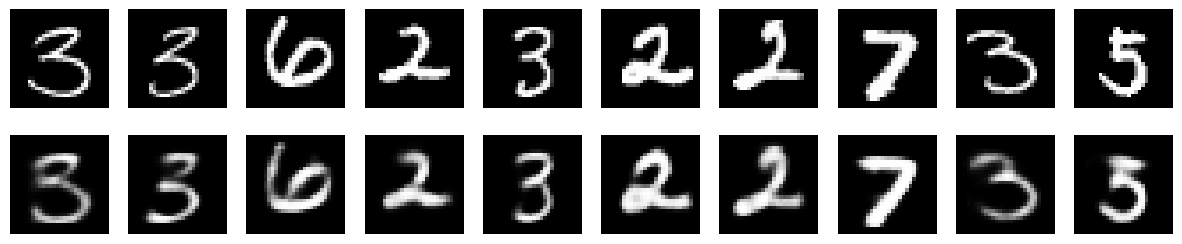

In [25]:
vae.eval()
with torch.no_grad():
    x, _ = next(iter(train_loader))
    x = x.view(-1, input_dim)
    x_hat, mu, logvar = vae(x)
    x = x.view(-1, input_dim)
    x_hat, _, _ = vae(x)
    x = x.view(-1, 28, 28)
    x_hat = x_hat.view(-1, 28, 28)
    fig, axs = plt.subplots(2, 10, figsize=(15, 3))  # Restored 2 rows for original and reconstructed images
    # Visualizing new Generation data
    for i in range(10):
        axs[0, i].imshow(x[i].cpu().numpy(), cmap='gray')  # Display original image in the first row
        axs[1, i].imshow(x_hat[i].cpu().numpy(), cmap='gray')  # Display reconstructed image in the second row
        axs[0, i].axis('off')
        axs[1, i].axis('off')
    plt.show()

In [19]:
#encoder then reconstruct

In [20]:
#new data generate

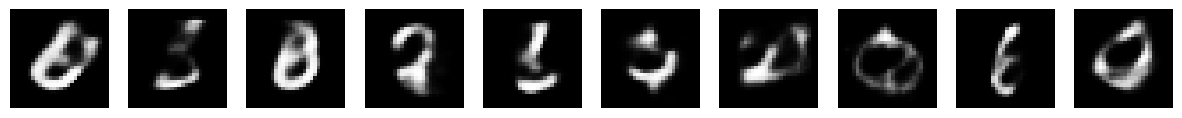

In [30]:
with torch.no_grad():
    z = torch.randn(10, laten_dim)
    sample = vae.decoder(z)
    sample = sample.view(-1, 28, 28)
    fig, axs = plt.subplots(1, 10, figsize=(15, 3))  # Changed to 1 row, 10 columns
    for i in range(10):
        axs[i].imshow(sample[i].cpu().numpy(), cmap='gray')  # Now using axs[i] to access individual subplot
        axs[i].axis('off')
    plt.show()